In [3]:
import pandas as pd

In [1]:
ls

 驱动器 C 中的卷是 OS
 卷的序列号是 DA1F-0C49

 C:\Users\likui\Documents\python3 的目录

2018/11/25  07:25    <DIR>          .
2018/11/25  07:25    <DIR>          ..
2018/11/25  07:25    <DIR>          .ipynb_checkpoints
2018/11/25  07:24            53,152 10k_articles.txt
2018/11/25  07:24            55,099 80k.tar.gz
2018/11/18  02:40            59,056 assignment1.ipynb
2018/11/17  17:14                72 Untitled.ipynb
2018/11/17  17:14                 0 untitled.txt
2018/11/18  10:31             5,567 Untitled1.ipynb
2018/11/25  07:25                72 Untitled2.ipynb
               7 个文件        173,018 字节
               3 个目录 61,811,466,240 可用字节


In [4]:
news_content = pd.read_csv('10k_articles.txt', encoding='gb18030')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 76, saw 11


In [19]:
filename = '10k_articles.txt'

In [27]:
all_content = open(filename,encoding='gb18030',errors='ignore').read()

In [28]:
len(all_content)

53131

In [29]:
all_content[:200]

'\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://assets-cdn.github.com">\n  <link rel="dns-prefetch" href="https://avatars0.githubuser'

In [33]:
from collections import Counter


In [30]:
ALL_CHARACTER='新华社华盛顿４月１３日电记者林小春寻找外星生命目前最理想的地点可能是土星卫星土卫二上的冰封小世界美国航天局１３日宣布卡西尼探测器在土卫二喷出的羽流中探测到氢气这意味着土卫二具备生命存在的几乎所有已知要素n这项发表在美国科学杂志上的研究显示土卫二羽流中９８是水约１是氢气其余是二氧化碳甲烷和氨等组成的混合物n卡西尼项目科学家琳达施皮尔克当天在网'

In [63]:
ALL_CHARACTER

'新华社华盛顿４月１３日电记者林小春寻找外星生命目前最理想的地点可能是土星卫星土卫二上的冰封小世界美国航天局１３日宣布卡西尼探测器在土卫二喷出的羽流中探测到氢气这意味着土卫二具备生命存在的几乎所有已知要素n这项发表在美国科学杂志上的研究显示土卫二羽流中９８是水约１是氢气其余是二氧化碳甲烷和氨等组成的混合物n卡西尼项目科学家琳达施皮尔克当天在网'

In [65]:
all_character_counts = Counter(ALL_CHARACTER)
all_character_counts.most_common()



[('的', 6),
 ('土', 5),
 ('卫', 5),
 ('二', 5),
 ('是', 4),
 ('在', 4),
 ('１', 3),
 ('星', 3),
 ('华', 2),
 ('３', 2),
 ('日', 2),
 ('小', 2),
 ('生', 2),
 ('命', 2),
 ('目', 2),
 ('上', 2),
 ('美', 2),
 ('国', 2),
 ('天', 2),
 ('卡', 2),
 ('西', 2),
 ('尼', 2),
 ('探', 2),
 ('测', 2),
 ('羽', 2),
 ('流', 2),
 ('中', 2),
 ('氢', 2),
 ('气', 2),
 ('这', 2),
 ('n', 2),
 ('项', 2),
 ('科', 2),
 ('学', 2),
 ('新', 1),
 ('社', 1),
 ('盛', 1),
 ('顿', 1),
 ('４', 1),
 ('月', 1),
 ('电', 1),
 ('记', 1),
 ('者', 1),
 ('林', 1),
 ('春', 1),
 ('寻', 1),
 ('找', 1),
 ('外', 1),
 ('前', 1),
 ('最', 1),
 ('理', 1),
 ('想', 1),
 ('地', 1),
 ('点', 1),
 ('可', 1),
 ('能', 1),
 ('冰', 1),
 ('封', 1),
 ('世', 1),
 ('界', 1),
 ('航', 1),
 ('局', 1),
 ('宣', 1),
 ('布', 1),
 ('器', 1),
 ('喷', 1),
 ('出', 1),
 ('到', 1),
 ('意', 1),
 ('味', 1),
 ('着', 1),
 ('具', 1),
 ('备', 1),
 ('存', 1),
 ('几', 1),
 ('乎', 1),
 ('所', 1),
 ('有', 1),
 ('已', 1),
 ('知', 1),
 ('要', 1),
 ('素', 1),
 ('发', 1),
 ('表', 1),
 ('杂', 1),
 ('志', 1),
 ('研', 1),
 ('究', 1),
 ('显', 1),
 ('示', 1),
 ('９', 1),

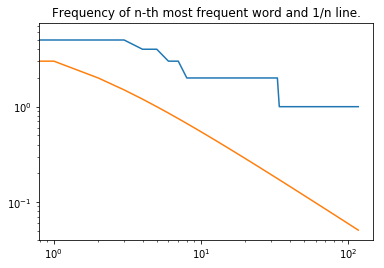

In [66]:
M = all_character_counts.most_common()[0][1]
import  matplotlib.pyplot  as plt
M

from matplotlib.pyplot import yscale, xscale, title, plot
yscale('log'); xscale('log'); title('Frequency of n-th most frequent word and 1/n line.')
plot([c for (w, c) in all_character_counts.most_common()])
plot([M/i for i in range(1, len(all_character_counts)+1)]);

In [67]:
all_character_counts.get('💰', 1)

1

In [ ]:
def get_probability_from_counts(count):
    all_occurences = sum(count.values())
    def get_prob(item): 
        return count[item] / all_occurences
    return get_prob

get_char_prob = get_probability_from_counts(all_character_counts)

def get_char_probability(char): 
    all_occurences = sum(all_character_counts.values())
    return all_character_counts[char] / all_occurences